* Simulate the behavior of a rebasing token using Python in a Jupyter notebook.
* https://tree.taiga.io/project/cyotee-1-daosys/task/8

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
cwd =  os.getcwd().replace("notebooks/test","")
os.chdir(cwd)

from python.dev.token import Token

In [9]:
TYPE_DEPOSIT_TOKEN = 'DEPOSIT'
N_USERS = 10

testToken = Token(TYPE_DEPOSIT_TOKEN)

for k in range(N_USERS):
    deposit = np.random.gamma(2, 10, 1)[0]
    tokenAddress = testToken.gen_address()
    testToken.deposit(deposit, tokenAddress)

* Reflect the balance of each holder in a graph. Initial thought is as a bar graph, a different visualization may be selected by the implementor based on what they think will be best. Possibly two graphs, one for actual balances, and one for the percentage of supply for each holder.

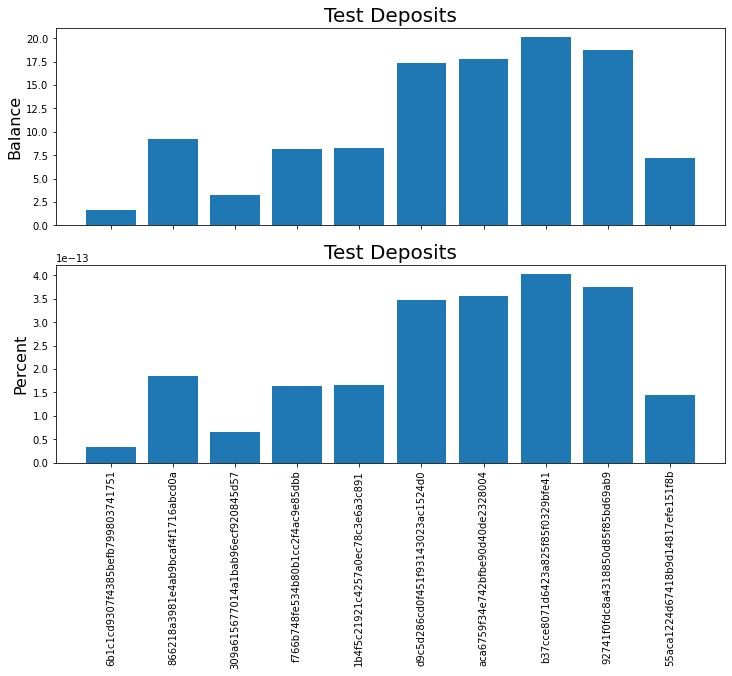

In [10]:
total_supply = testToken.get_supply().get_total_supply()
deposits = testToken.get_addresses().get_balances()
balances = list(deposits.values())
addresses = list(deposits.keys())
percent_balance = balances/total_supply

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(12, 8))
ax1.set_title("Test Deposits", fontsize=20)
ax1.set_ylabel('Balance', fontsize=16)
ax1.bar(addresses,balances)

ax2.set_title("Test Deposits", fontsize=20)
ax2.set_ylabel('Percent', fontsize=16)
ax2.bar(addresses,percent_balance)

plt.xticks(rotation=90)
plt.show()

* Ability to introduce a total supply change delta. When the total supply change is made, the balances of all holders should be updated proportionally.

In [11]:
for address in addresses[:5]:
    deposit = np.random.gamma(2, 10, 1)[0]
    testToken.deposit(deposit, address)

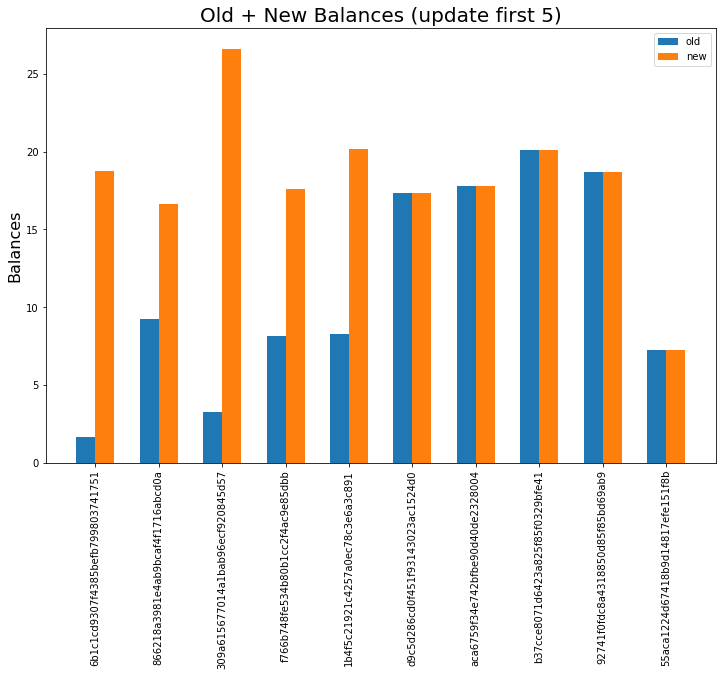

In [12]:
total_supply = testToken.get_supply().get_total_supply()
deposits = testToken.get_addresses().get_balances()
new_balances = list(deposits.values())
addresses = list(deposits.keys())
percent_balance = balances/total_supply

bar_width = 0.3
x = np.arange(N_USERS)

fig, (ax1) = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(12, 8))
ax1.set_title("Old + New Balances (update first 5)", fontsize=20)
ax1.set_ylabel('Balances', fontsize=16)
b1 = ax1.bar(x,balances, width=bar_width, label='old')
b2 = ax1.bar(x + bar_width,new_balances, width=bar_width, label='new')
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(addresses)
plt.legend()
plt.xticks(rotation=90)
plt.show()


* Transfer amounts of the rebasing token based on the apparent balance. Proportional distribution through rebasing must account for user balance changes.

In [13]:
testToken.transfer(2, addresses[8], addresses[9])
new_balances = list(deposits.values())

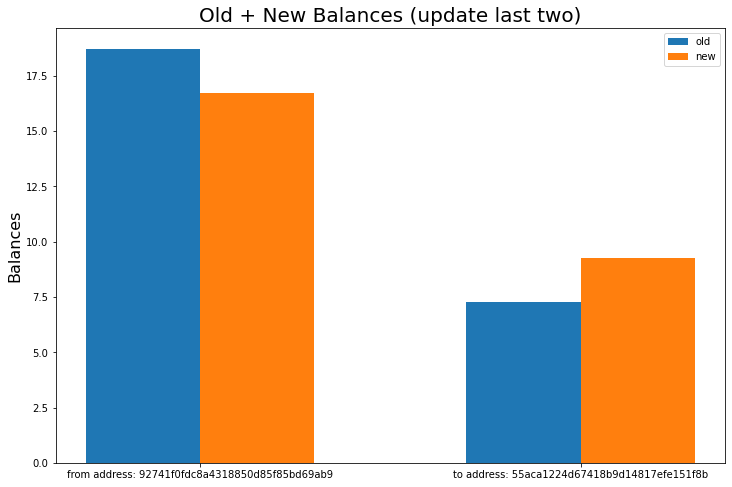

In [14]:
bar_width = 0.3
x = np.arange(2)

fig, (ax1) = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(12, 8))
ax1.set_title("Old + New Balances (update last two)", fontsize=20)
ax1.set_ylabel('Balances', fontsize=16)
b1 = ax1.bar(x, balances[8:], width=bar_width, label='old')
b2 = ax1.bar(x + bar_width, new_balances[8:], width=bar_width, label='new')
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(['from address: '+addresses[8], 'to address: '+addresses[9]])
plt.legend()
plt.show()
